# Topic modelling (LDA)

In [75]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [76]:
import pandas as pd

In [77]:
columns_to_drop = ['dataFrom', 'date', 'rating', 'extracted_devresp', 'devresp_time']
review_data = pd.read_csv('data/combined_data.csv').drop(columns_to_drop,axis=1)
review_data.head()

,review
0,Great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin..."
2,Notice that the drop in interest rate of 0.8% ...
3,Sending money into my GXS account is a breeze ...
4,I have to say that the UI/UX is one of the bes...


In [78]:
'''review_data = pd.read_csv('data/K8 Reviews v0.2.csv').drop('sentiment',axis=1)
review_data.head() '''

"review_data = pd.read_csv('data/K8 Reviews v0.2.csv').drop('sentiment',axis=1)\nreview_data.head() "

In [79]:
''' columns_to_drop = ['date', 'developerResponse', 'rating', 'isEdited', 'title', 'userName', 'Unnamed: 0']
review_data = pd.read_csv('data/AppStoreData.csv').drop(columns_to_drop,axis=1)
review_data.head() '''

" columns_to_drop = ['date', 'developerResponse', 'rating', 'isEdited', 'title', 'userName', 'Unnamed: 0']\nreview_data = pd.read_csv('data/AppStoreData.csv').drop(columns_to_drop,axis=1)\nreview_data.head() "

In [80]:
review_data.shape

# We have 14K reviews 

(418, 1)

# Data Pre-Processing
### 1. Replacing/Dropping NULL values

In [81]:
review_data.isnull().sum()

# Since our data has no null values will be skip this step

review    0
dtype: int64

### 2. Converting to LOWER case

In [82]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

'''review_data['clean_review'] = review_data['extracted_devresp'].apply(lambda x: str(x).lower())
review_data.head()'''

"review_data['clean_review'] = review_data['extracted_devresp'].apply(lambda x: str(x).lower())\nreview_data.head()"

### 3. REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS)

In [83]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...",a bank like no other no bank have such amazin...
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of ...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui ux is one of the bes...


### 4. REMOVING WHITE SPACE

In [84]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...",a bank like no other no bank have such amazing...
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of in sa...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui ux is one of the bes...


### 5. WORD TOKENIZATION

In [85]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/neleht./nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, app, with, attractive, intere..."
1,"A bank like no other, no bank have such amazin...","[a, bank, like, no, other, no, bank, have, suc..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, that, the, drop, in, interest, rate, ..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, into, my, gxs, account, is, a..."
4,I have to say that the UI/UX is one of the bes...,"[i, have, to, say, that, the, ui, ux, is, one,..."


### 6. REMOVE UNNECESSARY WORDS

In [87]:
%pip install stopwords

Note: you may need to restart the kernel to use updated packages.


In [88]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neleht./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])


review_data.head()


,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, attractive, interest, rates, ..."
1,"A bank like no other, no bank have such amazin...","[bank, like, bank, amazing, feature, separate,..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, saving, account..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, account, breeze, instantaneou..."
4,I have to say that the UI/UX is one of the bes...,"[best, seen, digibank, mobile, finally, strong..."


In [90]:
# for dev_response
'''custom_stopwords = ['Hi', 'please', 'thank you', 'happy', 'thrilled', 'delighted', 'thank', 'there', 'review', 'sorry', 'hope',]
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in custom_stopwords and len(word) > 3 and word.isalpha()]) '''

"custom_stopwords = ['Hi', 'please', 'thank you', 'happy', 'thrilled', 'delighted', 'thank', 'there', 'review', 'sorry', 'hope',]\nreview_data['clean_review'] = review_data['clean_review'].apply(lambda x:[word for word in x if word not in custom_stopwords and len(word) > 3 and word.isalpha()]) "

In [91]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

### 7. LEMMATIZATION

In [92]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/neleht./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [93]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, attractive, interest, rate, p..."
1,"A bank like no other, no bank have such amazin...","[bank, like, bank, amazing, feature, separate,..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, saving, account..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, account, breeze, instantaneou..."
4,I have to say that the UI/UX is one of the bes...,"[best, seen, digibank, mobile, finally, strong..."


### 8. Extracting only NOUN

In [94]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/neleht./nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [95]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [96]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [97]:
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe..."
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason..."
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ..."
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust..."


### 9. Document Term Matrix

In [98]:
import gensim
from gensim import corpora

In [99]:
dictionary = corpora.Dictionary(review_data['clean_review'])
print(dictionary)

# We have 6724 unique tokens

Dictionary(738 unique tokens: ['account', 'apple', 'banking', 'card', 'debit']...)


In [100]:
doc_term_matrix = review_data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and thier count in corpus

0    [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1    [(5, 3), (9, 1), (10, 3), (11, 1), (12, 1), (1...
2    [(0, 9), (5, 7), (9, 6), (10, 1), (34, 1), (35...
3    [(0, 2), (2, 1), (8, 1), (23, 2), (30, 1), (43...
4    [(2, 1), (8, 1), (10, 1), (26, 1), (33, 1), (6...
5    [(0, 1), (10, 4), (42, 1), (61, 1), (83, 1), (...
6    [(2, 1), (5, 1), (9, 1), (10, 1), (32, 1), (74...
7    [(2, 1), (7, 1), (10, 3), (17, 1), (23, 1), (3...
8    [(17, 1), (25, 1), (32, 1), (33, 1), (74, 1), ...
9    [(0, 2), (6, 1), (8, 1), (10, 3), (21, 1), (56...
Name: clean_review, dtype: object

### SEEDING LDA

In [101]:
import os
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import numpy as np
from gensim.models.ldamulticore import LdaMulticore
import gensim
from nltk.corpus import stopwords
stops = stopwords.words("english")

In [102]:
ps = PorterStemmer()

App_Responsiveness = ['freeze', 'crash', 'buggy', 'speed', 'fast', 'crash', 'swift', 'rapid', 'seamless', 'smooth', 'wait', 'snappy', 'load', 'efficient', 'error']
Money_Growth = ['drop', 'interest rate', 'ROI', 'interest', 'rates', 'savings', 'p.a.']
Customer_Services = ['wait time', 'efficient', 'response', 'customer', 'support', 'hotline', 'email', 'feedback','suggestion']

Services_and_Products = ['deposit', 'repayment', 'loan', 'pocket', 'digital', 'transfer', 'payee', 'saving', 'convenient', 'QR', 'deposit']
User_Interface = ['ease', 'use', 'easy', 'clear', 'friendly', 'seamless', 'functionality', 'graphics', 'design', 'UI', 'UX', 'theme', 'UI/UX', 'interface', 'intuitive']
Credit_card = ['rebates', 'debit', 'creditcard', 'credit', 'card']

Login_Account_Setup = ['registration', 'singpass', 'password', 'biometric', 'onboard', 'setup', 'set', 'up', 'login' , 'open', 'signup', 'fingerprint', 'launch', 'register', 'create', 'application', '2FA', 'download', 'biometrics', 'sign']
Competition = ['Trust', 'maribank', 'T' , 'bills', 'OCBC', 'Timo']
Safety = ['password', 'pin', 'particulars', 'hack', 'security', 'secure', 'safe']

Customer_trust = ['misleading', 'deceive', 'fake' , 'false', 'scam']


#stemming 

App_Responsiveness = [ps.stem(word) for word in App_Responsiveness]
Money_Growth = [ps.stem(word) for word in Money_Growth]
Customer_Services = [ps.stem(word) for word in Customer_Services]

Services_and_Products = [ps.stem(word) for word in Services_and_Products]
User_Interface = [ps.stem(word) for word in User_Interface]
Credit_card = [ps.stem(word) for word in Credit_card]

Login_Account_Setup = [ps.stem(word) for word in Login_Account_Setup]
Competition = [ps.stem(word) for word in Competition]
Safety = [ps.stem(word) for word in Safety]

Customer_trust = [ps.stem(word) for word in Customer_trust]

'''
topic_lookup_data['Topic_Name'] = ['App Responsiveness','Money Growth (Interest Rates)','Customer Services','Services & Products','User Interface','Credit card', 'Login & Account Setup', 'Competition', 'Safety', 'Customer trust']

topic_lookup_data['Top_Keywords'] =  {
    0: ['freeze', 'crash', 'buggy', 'transaction', 'speed', 'fast', 'crash', 'breeze', 'swift', 'rapid', 'seamless', 'smooth', 'wait', 'hassle', 'snappy', 'load', 'fingertips', 'efficient', 'error'],
    1: ['drop', 'daily', 'min', 'disbursement', 'ROI', 'interest', 'rates', 'savings', 'p.a.'],
    2: ['wait', 'time', 'efficient', 'late', 'response', 'customer', 'support', 'hotline', 'email', 'feedback','suggestion'],
    3: ['application', 'deposit', 'repayment', 'loan', 'pocket', 'digital', 'money', 'transfer', 'payee', 'lucky', 'draw', 'saving', 'convenient', 'buzz', 'transparent', 'useless', 'block', 'mistake', 'pocket', 'QR', 'deposit'],
    4: ['ease', 'use', 'easy', 'clear', 'friendly', 'seamless', 'functionality', 'icon', 'graphics', 'design', 'UI', 'UX', 'theme', 'UI/UX', 'interface', 'intuitive', 'user', 'beautiful'],
    5: ['rebates', 'rewards', 'programme', 'debit', 'creditcard', 'credit', 'card'],
    6: ['registration', 'singpass', 'password', 'biometric', 'onboard', 'form', 'setup', 'set', 'up', 'login' , 'open', 'signup', 'fingerprint', 'launch', 'register', 'create', 'application', '2FA', 'download', 'biometrics', 'sign'],
    7: ['Trust', 'maribank', 'T' , 'bills', 'OCBC', 'Timo'],
    8: ['password', 'pin', 'particulars', 'QR', 'bug', 'hack', 'security', 'secure', 'insecure', 'safe'],
    9: ['misleading', 'deceive', 'fake' , 'false', 'scam']
}
'''

"\ntopic_lookup_data['Topic_Name'] = ['App Responsiveness','Money Growth (Interest Rates)','Customer Services','Services & Products','User Interface','Credit card', 'Login & Account Setup', 'Competition', 'Safety', 'Customer trust']\n\ntopic_lookup_data['Top_Keywords'] =  {\n    0: ['freeze', 'crash', 'buggy', 'transaction', 'speed', 'fast', 'crash', 'breeze', 'swift', 'rapid', 'seamless', 'smooth', 'wait', 'hassle', 'snappy', 'load', 'fingertips', 'efficient', 'error'],\n    1: ['drop', 'daily', 'min', 'disbursement', 'ROI', 'interest', 'rates', 'savings', 'p.a.'],\n    2: ['wait', 'time', 'efficient', 'late', 'response', 'customer', 'support', 'hotline', 'email', 'feedback','suggestion'],\n    3: ['application', 'deposit', 'repayment', 'loan', 'pocket', 'digital', 'money', 'transfer', 'payee', 'lucky', 'draw', 'saving', 'convenient', 'buzz', 'transparent', 'useless', 'block', 'mistake', 'pocket', 'QR', 'deposit'],\n    4: ['ease', 'use', 'easy', 'clear', 'friendly', 'seamless', 'func

In [103]:
seed_topics = {}
for word in App_Responsiveness:
    seed_topics[word] = 0
for word in Money_Growth:
    seed_topics[word] = 1
for word in Customer_Services:
    seed_topics[word] = 2

for word in Services_and_Products:
    seed_topics[word] = 3
for word in User_Interface:
    seed_topics[word] = 4
for word in Credit_card:
    seed_topics[word] = 5

for word in Login_Account_Setup:
    seed_topics[word] = 6
for word in Competition:
    seed_topics[word] = 7
for word in Safety:
    seed_topics[word] = 8


for word in Customer_trust:
    seed_topics[word] = 9


In [104]:
def create_eta(priors, etadict, ntopics):
    eta = np.full(shape=(ntopics, len(etadict)), fill_value=1) # create a (ntopics, nterms) matrix and fill with 1
    for word, topic in priors.items(): # for each word in the list of priors
        keyindex = [index for index,term in etadict.items() if term==word] # look up the word in the dictionary
        if (len(keyindex)>0): # if it's in the dictionary
            eta[topic,keyindex[0]] = 1e7  # put a large number in there
    eta = np.divide(eta, eta.sum(axis=0)) # normalize so that the probabilities sum to 1 over all topics
    return eta

In [105]:
eta = create_eta(seed_topics, dictionary, 10)

In [106]:
lda_model = LdaMulticore(corpus=doc_term_matrix,
                         id2word=dictionary,
                         num_topics=10,
                         eta=eta,
                         chunksize=2000,
                         passes=5,
                         random_state=42,
                         alpha='symmetric',
                         per_word_topics=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


### LDA

In [107]:
from IPython.display import clear_output

In [108]:
Lda = gensim.models.ldamodel.LdaModel
#ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)

lda_model = LdaMulticore(corpus=doc_term_matrix,
                         id2word=dictionary,
                         num_topics=10,
                         eta=eta,
                         chunksize=2000,
                         passes=5,
                         random_state=42,
                         alpha='symmetric',
                         per_word_topics=True)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [109]:
#ldamodel.print_topics()
lda_model.print_topics()

# We have printed all 12 topics and their keywords generated by LDA

[(0,
  '0.041*"time" + 0.025*"loan" + 0.018*"account" + 0.015*"phone" + 0.015*"list" + 0.014*"waste" + 0.013*"amount" + 0.010*"screen" + 0.010*"email" + 0.010*"work"'),
 (1,
  '0.043*"pocket" + 0.029*"love" + 0.024*"bank" + 0.024*"interest" + 0.021*"experience" + 0.020*"user" + 0.013*"rate" + 0.012*"fast" + 0.011*"banking" + 0.011*"transfer"'),
 (2,
  '0.059*"interest" + 0.057*"account" + 0.044*"rate" + 0.037*"bank" + 0.027*"money" + 0.017*"work" + 0.015*"transfer" + 0.014*"payee" + 0.013*"number" + 0.011*"increase"'),
 (3,
  '0.027*"pocket" + 0.025*"transfer" + 0.023*"time" + 0.021*"apps" + 0.020*"fast" + 0.017*"money" + 0.016*"cool" + 0.016*"support" + 0.012*"need" + 0.011*"proceed"'),
 (4,
  '0.052*"bank" + 0.033*"interest" + 0.032*"account" + 0.020*"transfer" + 0.020*"simple" + 0.019*"digital" + 0.019*"rate" + 0.017*"need" + 0.017*"offer" + 0.016*"please"'),
 (5,
  '0.045*"rate" + 0.036*"interest" + 0.025*"singpass" + 0.024*"sign" + 0.020*"bank" + 0.015*"show" + 0.015*"application"

### Visualizing LDA model topics

In [110]:
import pyLDAvis # To visualize lda model
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)
vis = pyLDAvis.gensim.prepare(lda_model,doc_term_matrix,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.119588 -0.002113       1        1  17.122882
4      0.107716  0.061820       2        1  13.623277
0     -0.101596 -0.030631       3        1  12.797202
8      0.021357 -0.151659       4        1  12.737889
1      0.055120  0.111282       5        1   9.284958
7      0.046033 -0.047077       6        1   8.606192
5      0.041294 -0.059508       7        1   8.463079
6     -0.084695 -0.008089       8        1   8.380484
3     -0.053867  0.108588       9        1   4.939734
9     -0.150950  0.017387      10        1   4.044303, topic_info=         Term       Freq      Total Category  logprob  loglift
0     account  63.000000  63.000000  Default  30.0000  30.0000
9        rate  44.000000  44.000000  Default  29.0000  29.0000
103      sign  33.000000  33.000000  Default  28.0000  28.0000
69       time  29.000000  29.000000  Default  27.0000  27.0000
128     phone  19.000000  19.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
262   proceed   0.709253   4.276252  Topic10  -4.9379   1.4112
263      told   0.709251   8.446474  Topic10  -4.9379   0.7306
140   mistake   0.709247   3.014904  Topic10  -4.9379   1.7607
229  response   0.709243   5.239128  Topic10  -4.9379   1.2081
56     advice   0.709242   3.839572  Topic10  -4.9379   1.5189

[612 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
543       9  0.713098    ability
344       3  0.148291     access
344       4  0.296582     access
344       6  0.148291     access
344       8  0.148291     access
...     ...       ...        ...
146       3  0.183394       year
146       4  0.183394       year
146       5  0.366787       year
408       2  0.320783  yesterday
408       4  0.641566  yesterday

[947 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 9, 2, 8, 6, 7, 4, 10])

Since, some topics in above graph are overlapping each other we will try to find optimal number of topics.

In [111]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model,texts=review_data['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())

# Compute Coherence Score


Coherence Score:  0.4151764107795527


In [112]:
# Computing coherence score for different size of topic
'''
def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    
    
    clear_output()
  return topic_num,cv_score
'''

def calculate_topic_cv(lda_model,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    lda_model = LdaMulticore(corpus=doc_term_matrix,
                         id2word=dictionary,
                         num_topics=10,
                         eta=eta,
                         chunksize=2000,
                         passes=5,
                         random_state=42,
                         alpha='symmetric',
                         per_word_topics=True)
    
    cv_score.append(CoherenceModel(model=lda_model,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    
    
    clear_output()
  return topic_num,cv_score



In [113]:
topic_num,cv_score = calculate_topic_cv(lda_model,review_data['clean_review'],dictionary,15)

In [114]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
2,0.415176
3,0.415176
4,0.415176
5,0.415176
6,0.415176
7,0.415176
8,0.415176
9,0.415176
10,0.415176


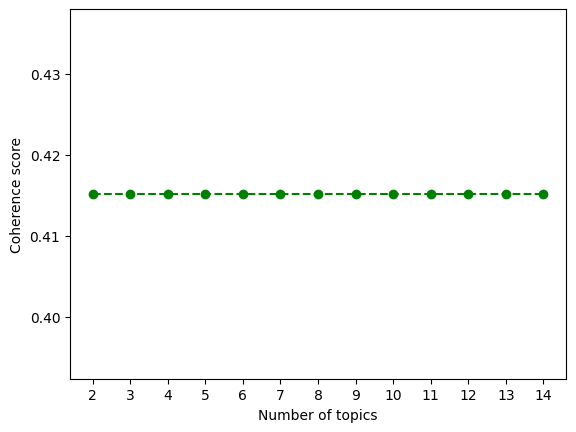

In [115]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

### we will be going with number of topic 6 as with 8 topics there will be many overlaps .

In [116]:
# Creating LDA model with number of topics as 6

Lda = gensim.models.ldamodel.LdaModel
#ldamodel = Lda(doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)

lda_model = LdaMulticore(corpus=doc_term_matrix,
                         id2word=dictionary,
                         num_topics=10,
                         eta=eta,
                         chunksize=2000,
                         passes=5,
                         random_state=42,
                         alpha='symmetric',
                         per_word_topics=True)

clear_output()
print(CoherenceModel(model=lda_model,texts=review_data['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.4151764107795527


In [117]:
lda_model.print_topics()

[(0,
  '0.041*"time" + 0.025*"loan" + 0.018*"account" + 0.015*"phone" + 0.015*"list" + 0.014*"waste" + 0.013*"amount" + 0.010*"screen" + 0.010*"email" + 0.010*"work"'),
 (1,
  '0.043*"pocket" + 0.029*"love" + 0.024*"bank" + 0.024*"interest" + 0.021*"experience" + 0.020*"user" + 0.013*"rate" + 0.012*"fast" + 0.011*"banking" + 0.011*"transfer"'),
 (2,
  '0.059*"interest" + 0.057*"account" + 0.044*"rate" + 0.037*"bank" + 0.027*"money" + 0.017*"work" + 0.015*"transfer" + 0.014*"payee" + 0.013*"number" + 0.011*"increase"'),
 (3,
  '0.027*"pocket" + 0.025*"transfer" + 0.023*"time" + 0.021*"apps" + 0.020*"fast" + 0.017*"money" + 0.016*"cool" + 0.016*"support" + 0.012*"need" + 0.011*"proceed"'),
 (4,
  '0.052*"bank" + 0.033*"interest" + 0.032*"account" + 0.020*"transfer" + 0.020*"simple" + 0.019*"digital" + 0.019*"rate" + 0.017*"need" + 0.017*"offer" + 0.016*"please"'),
 (5,
  '0.045*"rate" + 0.036*"interest" + 0.025*"singpass" + 0.024*"sign" + 0.020*"bank" + 0.015*"show" + 0.015*"application"

In [118]:
pyLDAvis.gensim.prepare(lda_model,doc_term_matrix,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.119588 -0.002113       1        1  17.122882
4      0.107716  0.061820       2        1  13.623277
0     -0.101596 -0.030631       3        1  12.797202
8      0.021357 -0.151659       4        1  12.737889
1      0.055120  0.111282       5        1   9.284958
7      0.046033 -0.047077       6        1   8.606192
5      0.041294 -0.059508       7        1   8.463079
6     -0.084695 -0.008089       8        1   8.380484
3     -0.053867  0.108588       9        1   4.939734
9     -0.150950  0.017387      10        1   4.044303, topic_info=         Term       Freq      Total Category  logprob  loglift
0     account  63.000000  63.000000  Default  30.0000  30.0000
9        rate  44.000000  44.000000  Default  29.0000  29.0000
103      sign  33.000000  33.000000  Default  28.0000  28.0000
69       time  29.000000  29.000000  Default  27.0000  27.0000
128     phone  19.000000  19.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
262   proceed   0.709253   4.276252  Topic10  -4.9379   1.4112
263      told   0.709251   8.446474  Topic10  -4.9379   0.7306
140   mistake   0.709247   3.014904  Topic10  -4.9379   1.7607
229  response   0.709243   5.239128  Topic10  -4.9379   1.2081
56     advice   0.709242   3.839572  Topic10  -4.9379   1.5189

[612 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
543       9  0.713098    ability
344       3  0.148291     access
344       4  0.296582     access
344       6  0.148291     access
344       8  0.148291     access
...     ...       ...        ...
146       3  0.183394       year
146       4  0.183394       year
146       5  0.366787       year
408       2  0.320783  yesterday
408       4  0.641566  yesterday

[947 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 9, 2, 8, 6, 7, 4, 10])

In [119]:
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe..."
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason..."
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ..."
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust..."


### Creating a lookup table for topics

In [120]:
topic_lookup_data = pd.DataFrame((lda_model.print_topics()),columns=['Topic_Number','Top_Keywords'])


#topic_lookup_data['Topic_Name'] = ['App Responsiveness','Money Growth (Interest Rates)','Customer Services','Services & Products','User Interface','Credit card', 'Login & Account Setup', 'Competition', 'Safety', 'Customer trust']
topic_lookup_data['Topic_Name'] = ['App Responsiveness','Money Growth (Interest Rates)','Customer Services','Services & Products','User Interface','Credit card', 'Login & Account Setup', 'Competition', 'Safety', 'Customer trust']

#topic_lookup_data['Topic_Name'] = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T11', 'T12', 'T13']

topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]

'''
topic_lookup_data['Top_Keywords'] =  {
    0: ['freeze', 'crash', 'buggy', 'transaction', 'speed', 'fast', 'crash', 'breeze', 'swift', 'rapid', 'seamless', 'smooth', 'wait', 'hassle', 'snappy', 'load', 'fingertips', 'efficient', 'error'],
    1: ['drop', 'daily', 'min', 'disbursement', 'ROI', 'interest', 'rates', 'savings', 'p.a.'],
    2: ['wait', 'time', 'efficient', 'late', 'response', 'customer', 'support', 'hotline', 'email', 'feedback','suggestion'],
    3: ['application', 'deposit', 'repayment', 'loan', 'pocket', 'digital', 'money', 'transfer', 'payee', 'lucky', 'draw', 'saving', 'convenient', 'buzz', 'transparent', 'useless', 'block', 'mistake', 'pocket', 'QR', 'deposit'],
    4: ['ease', 'use', 'easy', 'clear', 'friendly', 'seamless', 'functionality', 'icon', 'graphics', 'design', 'UI', 'UX', 'theme', 'UI/UX', 'interface', 'intuitive', 'user', 'beautiful'],
    5: ['rebates', 'rewards', 'programme', 'debit', 'creditcard', 'credit', 'card'],
    6: ['registration', 'singpass', 'password', 'biometric', 'onboard', 'form', 'setup', 'set', 'up', 'login' , 'open', 'signup', 'fingerprint', 'launch', 'register', 'create', 'application', '2FA', 'download', 'biometrics', 'sign'],
    7: ['Trust', 'maribank', 'T' , 'bills', 'OCBC', 'Timo'],
    8: ['password', 'pin', 'particulars', 'QR', 'bug', 'hack', 'security', 'secure', 'insecure', 'safe'],
    9: ['misleading', 'deceive', 'fake' , 'false', 'scam']
}
'''

topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())


topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,App Responsiveness,"['time', 'loan', 'account', 'phone', 'list', 'waste', 'amount', 'screen', 'email', 'work']"
1,1,Money Growth (Interest Rates),"['pocket', 'love', 'bank', 'interest', 'experience', 'user', 'rate', 'fast', 'banking', 'transfer']"
2,2,Customer Services,"['interest', 'account', 'rate', 'bank', 'money', 'work', 'transfer', 'payee', 'number', 'increase']"
3,3,Services & Products,"['pocket', 'transfer', 'time', 'apps', 'fast', 'money', 'cool', 'support', 'need', 'proceed']"
4,4,User Interface,"['bank', 'interest', 'account', 'transfer', 'simple', 'digital', 'rate', 'need', 'offer', 'please']"
5,5,Credit card,"['rate', 'interest', 'singpass', 'sign', 'bank', 'show', 'application', 'pocket', 'user', 'update']"
6,6,Login & Account Setup,"['phone', 'download', 'wait', 'singpass', 'bank', 'loan', 'user', 'time', 'apps', 'security']"
7,7,Competition,"['bank', 'interest', 'trust', 'sign', 'experience', 'change', 'banking', 'customer', 'rate', 'grab']"
8,8,Safety,"['account', 'sign', 'time', 'singpass', 'error', 'login', 'interest', 'bank', 'rate', 'issue']"
9,9,Customer trust,"['screen', 'login', 'phone', 'cant', 'code', 'buggy', 'account', 'payment', 'application', 'store']"


### Creating new columns and inserting topic numbers and names

In [121]:
for index,sent in enumerate(lda_model[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

IndexError: list index out of range

In [ ]:
for index,topic_num in enumerate(review_data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

AttributeError: 'DataFrame' object has no attribute 'Topic_Number'

In [ ]:
review_data

,review,clean_review,Topic_Number,Topic_Name
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe...",3,Services & Products
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go...",1,Money Growth (Interest Rates)
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason...",1,Money Growth (Interest Rates)
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ...",6,Login & Account Setup
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust...",4,User Interface
...,...,...,...,...
312,digital bank app does not work when it already...,"[digital, bank, work]",11,b
313,Not ready to roll out completely. Aint even al...,"[roll, aint, create, account, invitation]",3,Services & Products
314,"Can not download yet, just always show pending...","[download, show]",2,Customer Services
315,Looks cool and sleek! Can I get an invite if I...,"[look, cool, sleek, invite, star, review]",10,a


### Visualization

In [ ]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/cm.py:1583: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be 

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[:6].index,y=review_data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Topic_Name'

<Figure size 1200x600 with 0 Axes>

From above graph we can say that most of customers had issues with Battery of mobile

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[6:].index,y=review_data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Topic_Name'

<Figure size 1200x600 with 0 Axes>

From above graph we can say that most of customers had combined issues with,

Heating issue & Battery <br>
Camera, Sound & Battery <br>
turbo charger & Battery

### Extracting reviews of 5 topic(review of battery)

In [ ]:
review_data.loc[review_data.Topic_Number.str.contains('5'),['review','Topic_Name']]\
.style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
21,Can try for saving money !! My money said they liked there,Credit card
30,No more long waits and tons of paperwork to open a bank account. Looking forward to how GXS can generate a stronger value proposition for consumers.,Credit card
31,Like to use GXS apps that is link to Grabs apps for easy to transfer money from saving to topup Grabs account.,Credit card
40,The app is easy to navigate and optimise for people of all ages.,Credit card
41,"Brilliant app design, fast transactions, excellent rates. Keep up the good work! What more can I say?",Credit card
51,GXS touted a 3.48% interest in their savings pocket only to change the interest to 2.68% within a short period of only a month. A bank is only as good as it’s promises and this bank just lost it all. Will never use GXS again.,Money Growth (Interest Rates) & Credit card
88,Nice And Fast Bank,Credit card
95,Is this really an authentic app for GXS? Looks cheap.,Credit card
96,save ur money and grow,Credit card
112,Hi any chance for foreign to apply? Im work at sg,Credit card


In [ ]:
review_data.to_csv('/Users/neleht./Library/CloudStorage/OneDrive-NationalUniversityofSingapore/NUS ALL/Y3S2/DSA3101/DSA3101-Project/Topic-Analysis-of-Review-Data/TopicsofReviews.csv')

OSError: Cannot save file into a non-existent directory: '/Users/neleht./Library/CloudStorage/OneDrive-NationalUniversityofSingapore/NUS ALL/Y3S2/DSA3101/DSA3101-Project/Topic-Analysis-of-Review-Data'

### Conclusion

1. We can combine topic number 2 (Heating issue),3 (turbo charger), 5(Battery) <br>
2. If lenovo company improves their turbo charger which is causing heating issues in battery, the mobile will be more appreciated by users.
3. We can try to use other POS tags to improve our model.